# VAR/SVAR Raw Data Plot

### Data

* 利率：隔夜拆款利率

* 供給面：許可建照數

* 需求面：

    1. 消費者購屋貸款
    
    2. 人口總數
    
    3. 總戶數
    
    4. 淨遷入

* 房價：信義房價指數

### 環境設定

In [1]:
# 設定路徑
Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: matrixcalc

Loading required package: lattice

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘pack

In [2]:
options(warn=-1)    # 關掉warning
#options(warn=0)
options(scipen=999) #不要科學記號

### 讀資料

In [4]:
###### 讀取資料 ######
file = "data/df_raw_level.csv"
data = read.csv(file = file, header = TRUE)
#data = na.omit(data)

In [5]:
colnames(data)

[1] "Date"               "season"             "interest_rate"     
 [4] "permit"             "loan"               "hp"                
 [7] "Sentiment"          "population"         "permit_TPE"        
[10] "net_in_migrant_TPE" "household_TPE"      "population_TPE"    
[13] "hp_TPE"

In [14]:
data <- data[-nrow(data),]

In [27]:
data

,Date,season,interest_rate,permit,loan,hp,Sentiment,population,permit_TPE,net_in_migrant_TPE,household_TPE,population_TPE,hp_TPE
,<date>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1991-01-01,1,7.180000,10465,1658483,98.16,0.005097271,NA,NA,NA,NA,NA,90.59
2,1991-04-01,2,8.270000,17129,1728606,104.16,0.015780528,NA,NA,NA,NA,NA,95.02
3,1991-07-01,3,7.766667,17332,1848549,106.68,0.016126075,NA,NA,NA,NA,NA,98.59
4,1991-10-01,4,6.022667,20174,1965070,109.99,0.018451218,NA,NA,NA,NA,NA,102.10
5,1992-01-01,5,6.373333,19290,2109225,113.21,0.013148653,NA,NA,NA,NA,NA,104.35
6,1992-04-01,6,7.718667,24712,2203124,117.82,0.017371285,NA,NA,NA,NA,NA,108.33
7,1992-07-01,7,6.924333,22475,2577393,119.27,0.018751178,NA,NA,NA,NA,NA,111.19
8,1992-10-01,8,6.248333,20062,2635296,118.96,0.019887718,NA,NA,NA,NA,NA,110.03
9,1993-01-01,9,7.217000,18225,2719686,118.97,0.019401717,NA,NA,NA,NA,NA,107.80


# Raw Data

In [15]:
dim(data)

[1] 119  13

In [16]:
data$Date <- as.Date(data$Date)

In [17]:
i_level <- ggplot(data, aes(x = Date, y = interest_rate))+
    geom_line()

permit_level <- ggplot(data, aes(x = Date, y = permit))+
    geom_line()

loan_level <- ggplot(data, aes(x = Date, y = loan))+
    geom_line()

sentiment_level <- ggplot(data, aes(x = Date, y = Sentiment))+
    geom_line()

hp_level <- ggplot(data, aes(x = Date, y = hp))+
    geom_line()

In [18]:
pop_level <- ggplot(data, aes(x = Date, y = population))+
    geom_line()

permit_TPE_level <- ggplot(data, aes(x = Date, y = permit_TPE))+
    geom_line()

net_in_level <- ggplot(data, aes(x = Date, y = net_in_migrant_TPE))+
    geom_line()

hh_TPE_level <- ggplot(data, aes(x = Date, y = household_TPE))+
    geom_line()

pop_TPE_level <- ggplot(data, aes(x = Date, y = population_TPE))+
    geom_line()

hp_TPE_level <- ggplot(data, aes(x = Date, y = hp_TPE))+
    geom_line()

i_level
sentiment_level
permit_level
permit_TPE_level
loan_level
pop_level
pop_TPE_level
hh_TPE_level
net_in_level
hp_level
hp_TPE_level

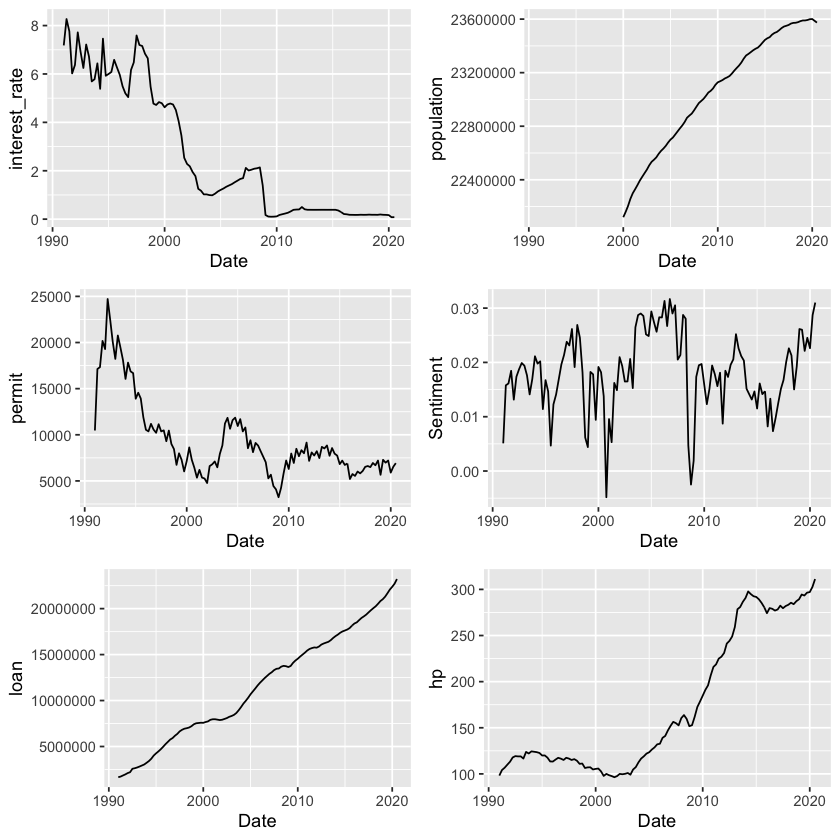

In [22]:
multiplot(i_level, permit_level,
          loan_level, pop_level,
          sentiment_level, hp_level,
          cols = 2)

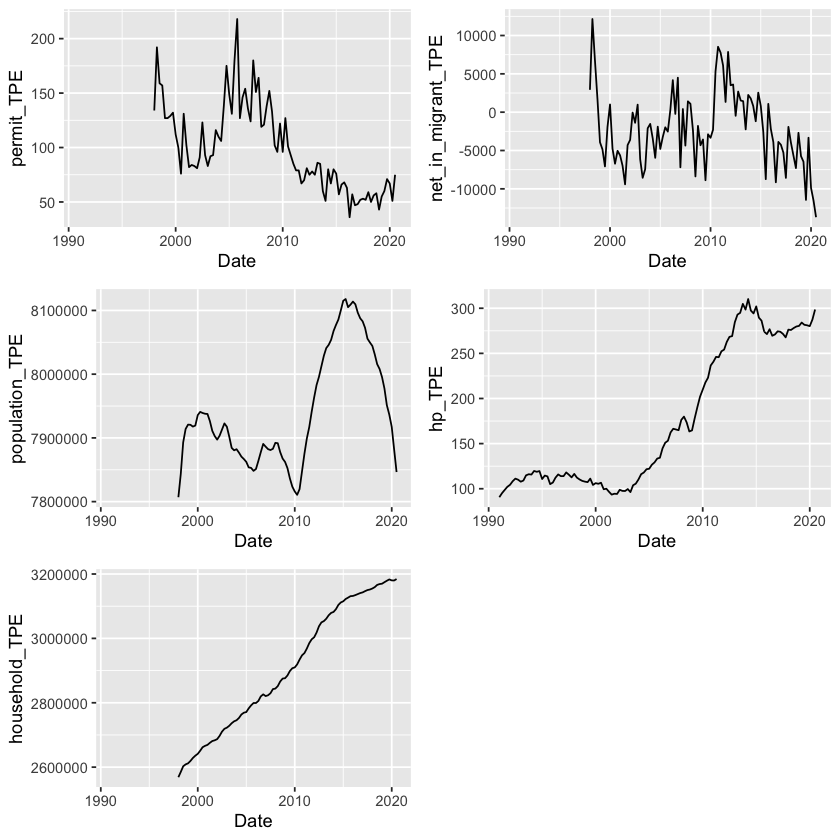

In [23]:
multiplot(permit_TPE_level, pop_TPE_level,
          hh_TPE_level, net_in_level,
          hp_TPE_level,
          cols = 2)

In [25]:
ggsave(filename = "result/raw_level_1.png", 
       plot = multiplot(i_level, permit_level,
                        loan_level, pop_level,
                        sentiment_level, hp_level,
                        cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

In [26]:
ggsave(filename = "result/raw_level_2.png", 
       plot = multiplot(permit_TPE_level, pop_TPE_level,
                        hh_TPE_level, net_in_level,
                        hp_TPE_level,
                        cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")